<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [88]:
df = pd.read_csv('/content/Customer-Churn-Records.csv')

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [4]:
df.shape

(10000, 18)

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [53]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [54]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

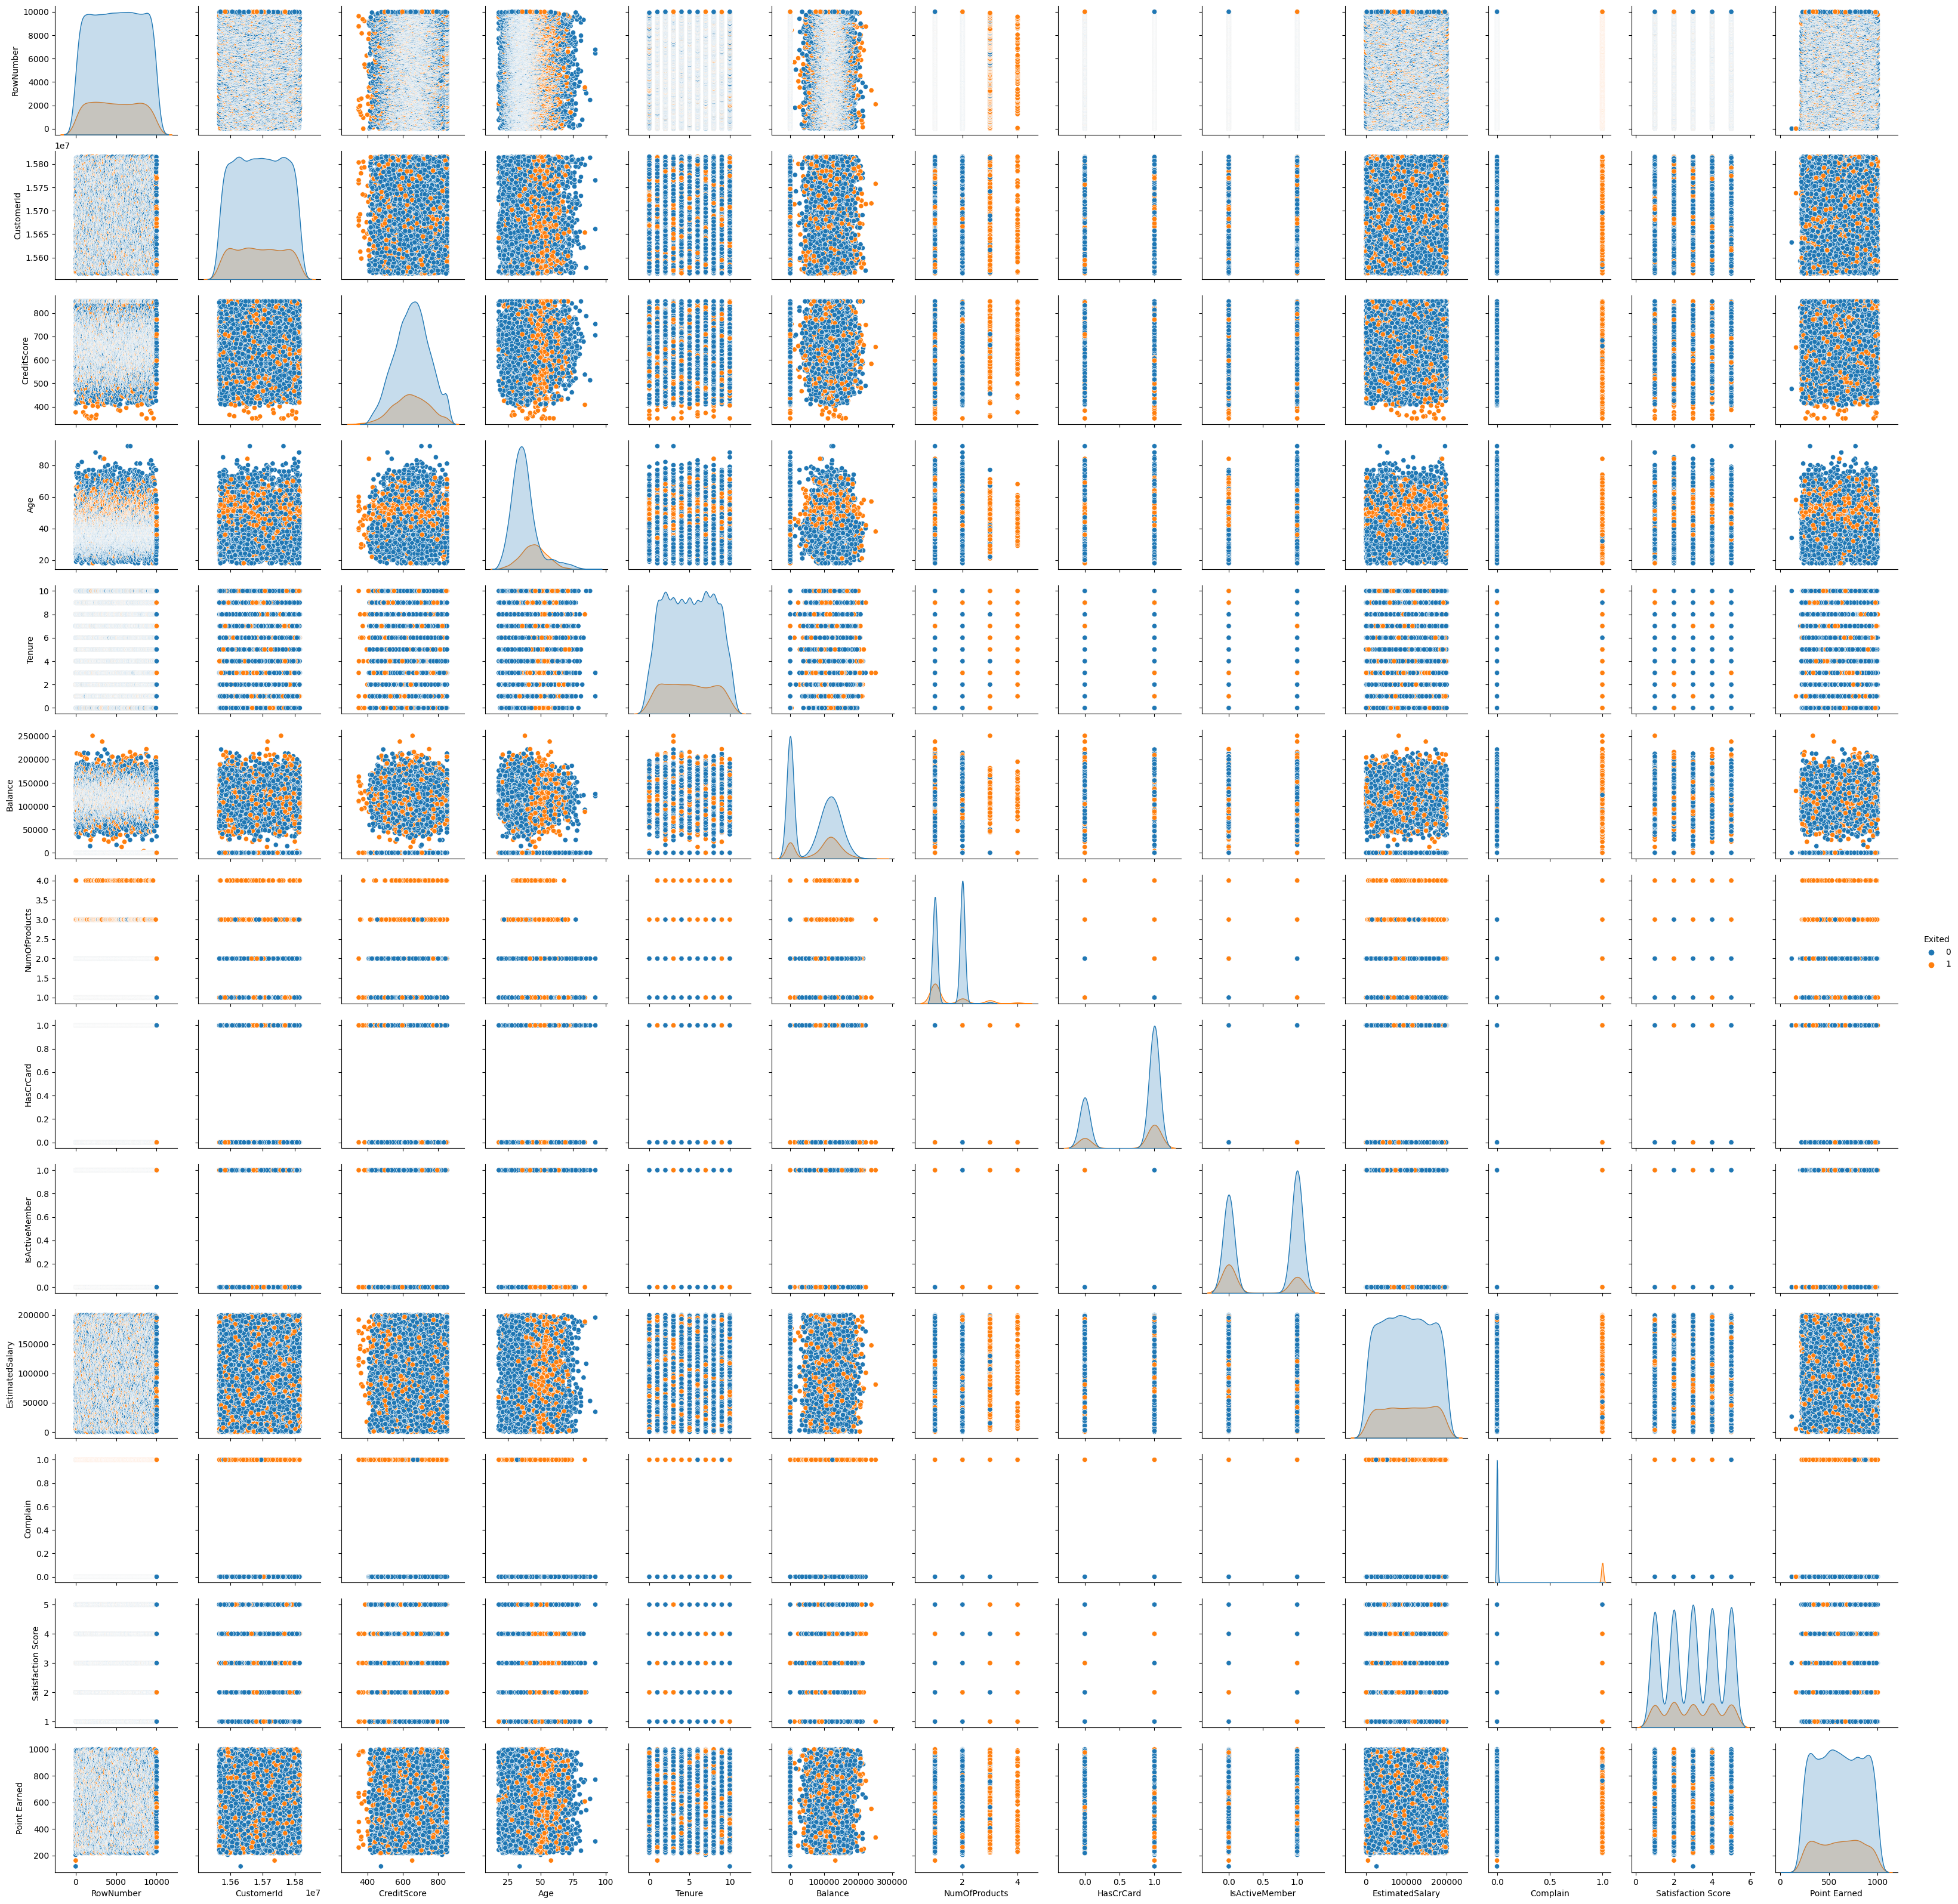

In [9]:
sns.pairplot(df,hue='Exited')
plt.show()

**Converting Categorical variables into numeric values**

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
LE = LabelEncoder()

In [91]:
df['Gender'] = LE.fit_transform(df['Gender'])

In [92]:
df['Geography'] = LE.fit_transform(df['Geography'])

In [93]:
df['Card Type'] = LE.fit_transform(df['Card Type'])

In [94]:
df.head()

RowNumber  CustomerId   Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602  Hargrave          619          0       0   42   
1          2    15647311      Hill          608          2       0   41   
2          3    15619304      Onio          502          0       0   42   
3          4    15701354      Boni          699          0       0   39   
4          5    15737888  Mitchell          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score  Card Type  \
0        101348.88       1         1                   2          0   
1        112542.58       0         1                   3          0   
2        113931.57       1         1                   3          0   
3         93826.63       0         0                   5          1   
4         79084.10       0         0                   5          1   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [95]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [97]:
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score','Card Type','Point Earned',]]
X

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Complain  \
0             1               1        101348.88         1   
1             0               1        112542.58         1   
2             1               0        113931.57         1   
3             0               0         93826.63         0   
4             1               1         79084.10         0   
...         ...             ...              ...       ...   
9995          1               0         96270.64         0   
9996          1               1        101699.77         0   
9997          0               1         42085.58         1   
9998          1               0         92888.52         1   
9999          1               0         38190.78         0   

      Satisfaction Score  Card Type  Point Earned  
0                      2          0           464  
1                      3          0           456  
2                      3          0           377  
3                      5          1           350  
4                      5          1           425  
...                  ...        ...           ...  
9995                   1          0           300  
9996                   5          2           771  
9997                   3          3           564  
9998                   2          1           339  
9999                   3          0           911  

[10000 rows x 14 columns]

In [98]:
y = df[['Exited']]
y

Exited
0          1
1          0
2          1
3          0
4          0
...      ...
9995       0
9996       0
9997       1
9998       1
9999       0

[10000 rows x 1 columns]

**Train & Test Split**

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Standardising our data**

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
STD = StandardScaler()

In [103]:
X_train_STD = STD.fit_transform(X_train)

In [104]:
X_test_STD = STD.transform(X_test)

**Convert y_train into 1D**

In [120]:
y_train_1d = np.ravel(y_train)

**Logistic Regression and Bayesian**

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK

In [122]:
LR = LogisticRegression()

In [116]:
space = {
    'C' : hp.uniform('C',1,5),
    'solver' : hp.choice('solver',['sag', 'saga']),
    'max_iter' : hp.quniform('max_iter',100,500,50)
}

In [123]:
def Bayesian(space):
  LR = LogisticRegression(
      C = float(space['C']),
      solver = space['solver'],
      max_iter = int(space['max_iter'])
  )
  accuracy = cross_val_score(LR,X_train_STD,y_train_1d,cv=10).mean()
  return{'loss' : -accuracy , 'status' : STATUS_OK}

In [124]:
trials = Trials()

In [125]:
Best = fmin(fn=Bayesian,space=space,algo=tpe.suggest,trials=trials,max_evals=200)

100%|██████████| 200/200 [02:33<00:00,  1.30trial/s, best loss: -0.9985000000000002]


In [126]:
Best

{'C': 1.4801916731951192, 'max_iter': 450.0, 'solver': 0}

In [128]:
LR = LogisticRegression(C=1.4801916731951192 , max_iter = 450 , solver = 'sag')

In [129]:
LR.fit(X_train_STD,y_train_1d)

LogisticRegression(C=1.4801916731951192, max_iter=450, solver='sag')

**Prediction**

In [130]:
y_hat = LR.predict(X_test_STD)

**Accuracy**

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [132]:
print(accuracy_score(y_test,y_hat))

0.999


In [133]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [134]:
print(confusion_matrix(y_test,y_hat))

[[1606    1]
 [   1  392]]
